<a href="https://colab.research.google.com/github/Manas-arora/Budget-basket/blob/dataset-analysis/data_analysis_bb_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import train_test_split



# Google Sheet Details
SHEET_ID = "1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c"
STORE_GIDS = {
    "Arora Store": "0",
    "Bharti Store": "1460814451",
    "Tiwari Store": "331987451",
    "Dadi Store": "854692905",
    "Dhiman Store": "1493846599"
    }
# Function to Load Data
def load_data_from_sheets(sheet_id, store_gids):
    store_data = {}
    for store, gid in store_gids.items():
        url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&gid={gid}"
        print(f"Fetching data from: {url}")
        try:
            df = pd.read_csv(url, header=0)
            if df.empty:
                print(f"⚠️ Warning: {store} data is empty!")
            else:
                print(f"✅ {store} data loaded successfully ({df.shape[0]} rows, {df.shape[1]} columns).")
            store_data[store] = df
        except Exception as e:
            print(f"❌ Error fetching {store}: {e}")
    return store_data

# Load dataset
dataset = load_data_from_sheets(SHEET_ID, STORE_GIDS)


Fetching data from: https://docs.google.com/spreadsheets/d/1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c/gviz/tq?tqx=out:csv&gid=0
✅ Arora Store data loaded successfully (33 rows, 28 columns).
Fetching data from: https://docs.google.com/spreadsheets/d/1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c/gviz/tq?tqx=out:csv&gid=1460814451
✅ Bharti Store data loaded successfully (33 rows, 28 columns).
Fetching data from: https://docs.google.com/spreadsheets/d/1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c/gviz/tq?tqx=out:csv&gid=331987451
✅ Tiwari Store data loaded successfully (33 rows, 28 columns).
Fetching data from: https://docs.google.com/spreadsheets/d/1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c/gviz/tq?tqx=out:csv&gid=854692905
✅ Dadi Store data loaded successfully (33 rows, 28 columns).
Fetching data from: https://docs.google.com/spreadsheets/d/1PtuPiSfGcBMY8lEeD2FCKHGUJAqUgQyDW9hF_fwOy8c/gviz/tq?tqx=out:csv&gid=1493846599
✅ Dhiman Store data loaded successfully (33 rows, 28 columns).


In [ ]:
# Data Preprocessing
def preprocess_data(store_data):
    processed_data = {}
    for store, df in store_data.items():
        print(f"\nBefore Processing {store}: {df.shape}")

        # Handle missing values
        df.replace("-", np.nan, inplace=True)
        df.fillna(method='ffill', inplace=True)

        # Ensure all price columns are numeric
        df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

        print(f"After Processing {store}: {df.shape}")
        processed_data[store] = df
    return processed_data

dataset = preprocess_data(dataset)


Before Processing Arora Store: (33, 28)
After Processing Arora Store: (33, 28)

Before Processing Bharti Store: (33, 28)
After Processing Bharti Store: (33, 28)

Before Processing Tiwari Store: (33, 28)
After Processing Tiwari Store: (33, 28)

Before Processing Dadi Store: (33, 28)
After Processing Dadi Store: (33, 28)

Before Processing Dhiman Store: (33, 28)
After Processing Dhiman Store: (33, 28)


<ipython-input-3-c058a23dbd1a>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Combine data for analysis
combined_df = pd.concat(dataset.values(), keys=dataset.keys(), names=["Store", "Index"])

# Reset index to bring "Store" as a column
combined_df = combined_df.reset_index()

# Rename index column if necessary
if "Store" not in combined_df.columns:
    combined_df.rename(columns={"level_0": "Store"}, inplace=True)

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(combined_df, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data.select_dtypes(include=[np.number]))
test_scaled = scaler.transform(test_data.select_dtypes(include=[np.number]))

# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(combined_df.describe())

# Select a subset of products (first 5)
subset_products = combined_df.columns[1:6]  # Select first 5 products for visualization

# Melt DataFrame for visualization
melted_df = combined_df.melt(id_vars=["Store"], var_name="Date", value_name="Price")

# Ensure consistency across stores
melted_df = melted_df[melted_df["Store"].isin(STORE_GIDS.keys())]
melted_df = melted_df[melted_df["Date"].isin(subset_products)]

# Set Seaborn theme for better visualization
sns.set_theme(style="whitegrid")

# Convert "Price" column to numeric, forcing errors='coerce' to handle non-numeric values
melted_df["Price"] = pd.to_numeric(melted_df["Price"], errors="coerce")

# Drop any rows where "Price" is NaN after conversion
melted_df.dropna(subset=["Price"], inplace=True)


Summary Statistics:
            Index       1 Jan       2 Jan       3 Jan       4 Jan       5 Jan  \
count  165.000000  165.000000  165.000000  165.000000  165.000000  165.000000   
mean    16.000000  175.969697  175.363636  175.090909  168.909091  175.212121   
std      9.550891  180.424548  179.749626  179.930943  166.746186  179.575509   
min      0.000000   30.000000   30.000000   30.000000   30.000000   30.000000   
25%      8.000000   70.000000   70.000000   70.000000   70.000000   75.000000   
50%     16.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
75%     24.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
max     32.000000  850.000000  850.000000  850.000000  850.000000  850.000000   

            6 Jan       7 Jan       8 Jan       9 Jan  ...      18 Jan  \
count  165.000000  165.000000  165.000000  165.000000  ...  165.000000   
mean   175.545455  175.606061  175.515152  175.636364  ...  177.303030   
std    179.917849  179.8086

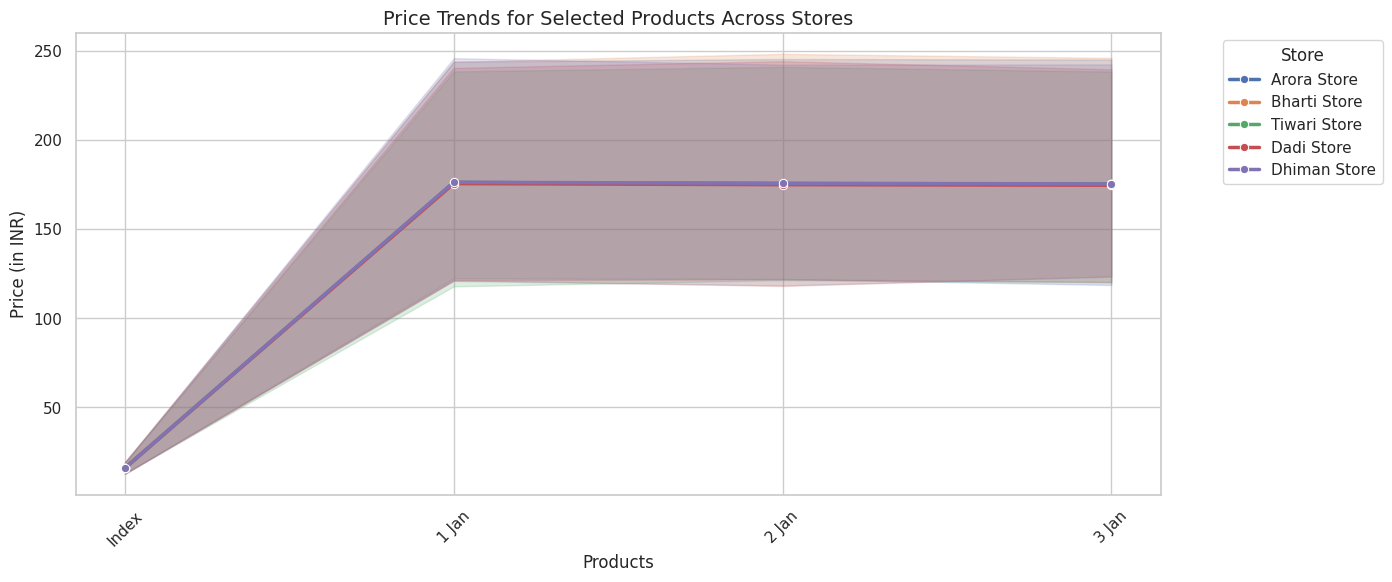

In [ ]:
# **1. Line Plot - Price Trends Over Time for Selected Products**
plt.figure(figsize=(14, 6))
sns.lineplot(data=melted_df, x="Date", y="Price", hue="Store", marker="o", linewidth=2.5)
plt.title("Price Trends for Selected Products Across Stores", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Products")
plt.ylabel("Price (in INR)")
plt.legend(title="Store", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


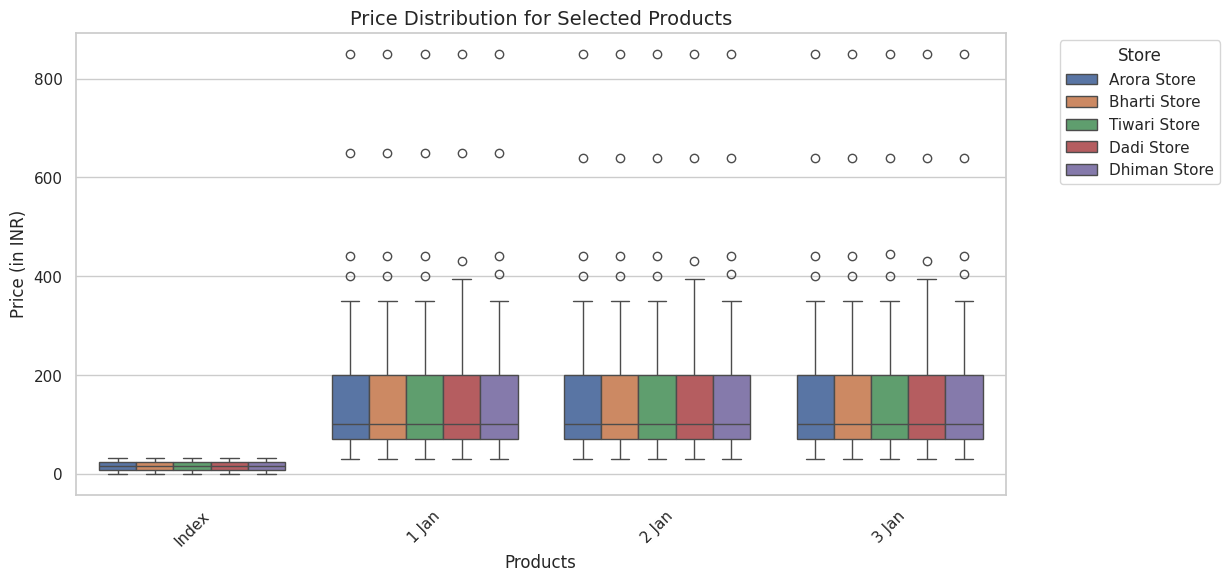

In [ ]:
# **2. Box Plot - Price Distribution for Selected Products**
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x="Date", y="Price", hue="Store")
plt.title("Price Distribution for Selected Products", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Products")
plt.ylabel("Price (in INR)")
plt.legend(title="Store", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-16-84841e329f12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted_df, x="Store", y="Price", inner="quartile", palette="muted")


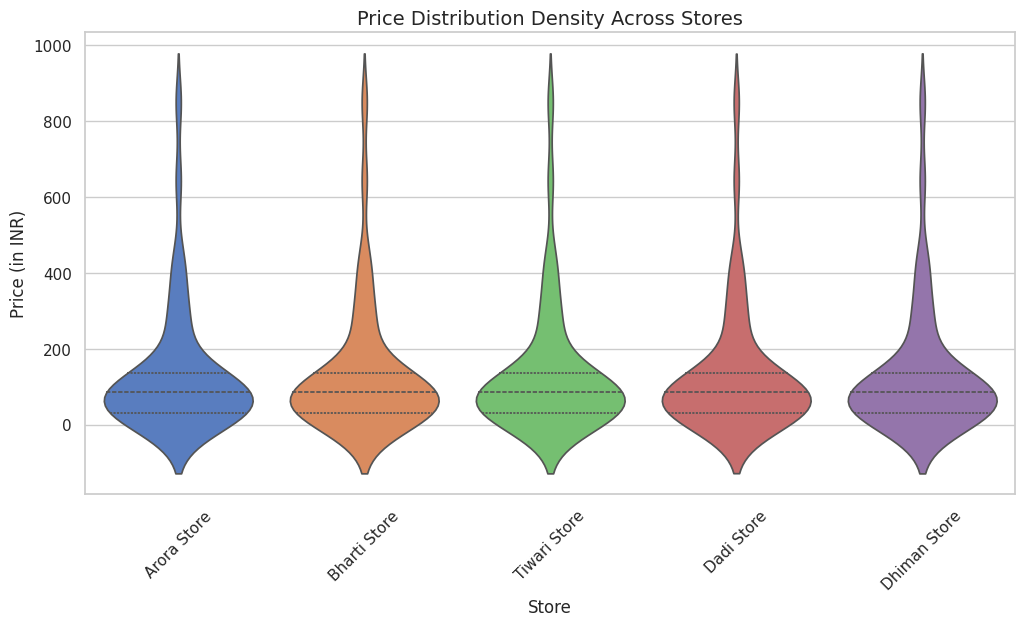

In [ ]:
# **3. Violin Plot - Price Density Across Stores**
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x="Store", y="Price", inner="quartile", palette="muted")
plt.title("Price Distribution Density Across Stores", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Store")
plt.ylabel("Price (in INR)")
plt.show()

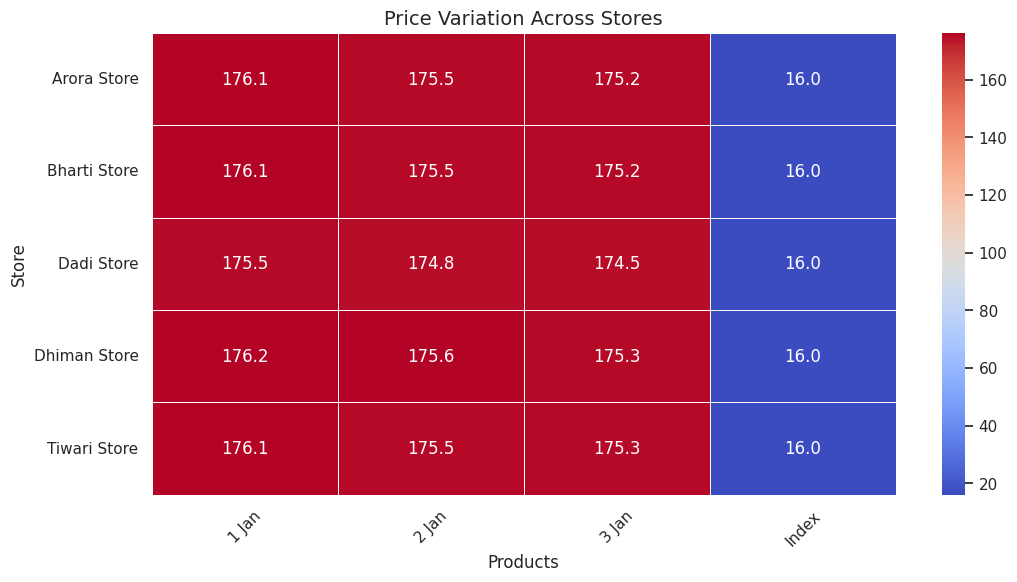

In [ ]:
# **4. Heatmap - Price Variation Over Time for Stores**
pivot_df = melted_df.pivot_table(index="Store", columns="Date", values="Price")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Price Variation Across Stores", fontsize=14)
plt.xlabel("Products")
plt.ylabel("Store")
plt.xticks(rotation=45)
plt.show()


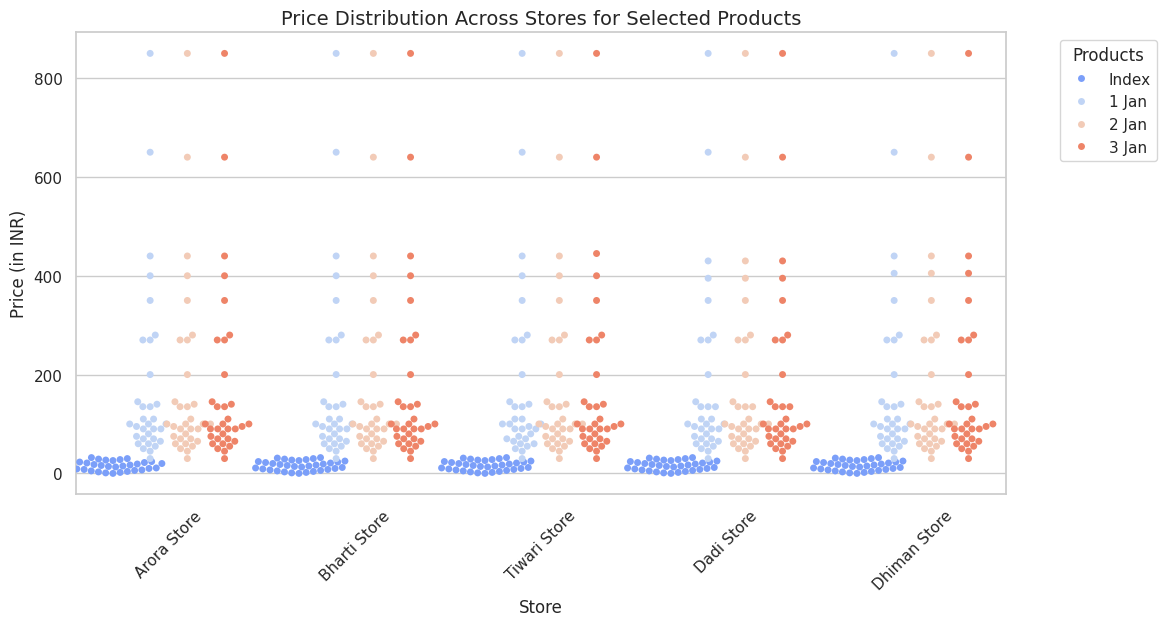

In [ ]:
# **5. Swarm Plot - Price Distribution Across Stores**
plt.figure(figsize=(12, 6))
sns.swarmplot(data=melted_df, x="Store", y="Price", hue="Date", dodge=True, palette="coolwarm", size=5)
plt.title("Price Distribution Across Stores for Selected Products", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Store")
plt.ylabel("Price (in INR)")
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

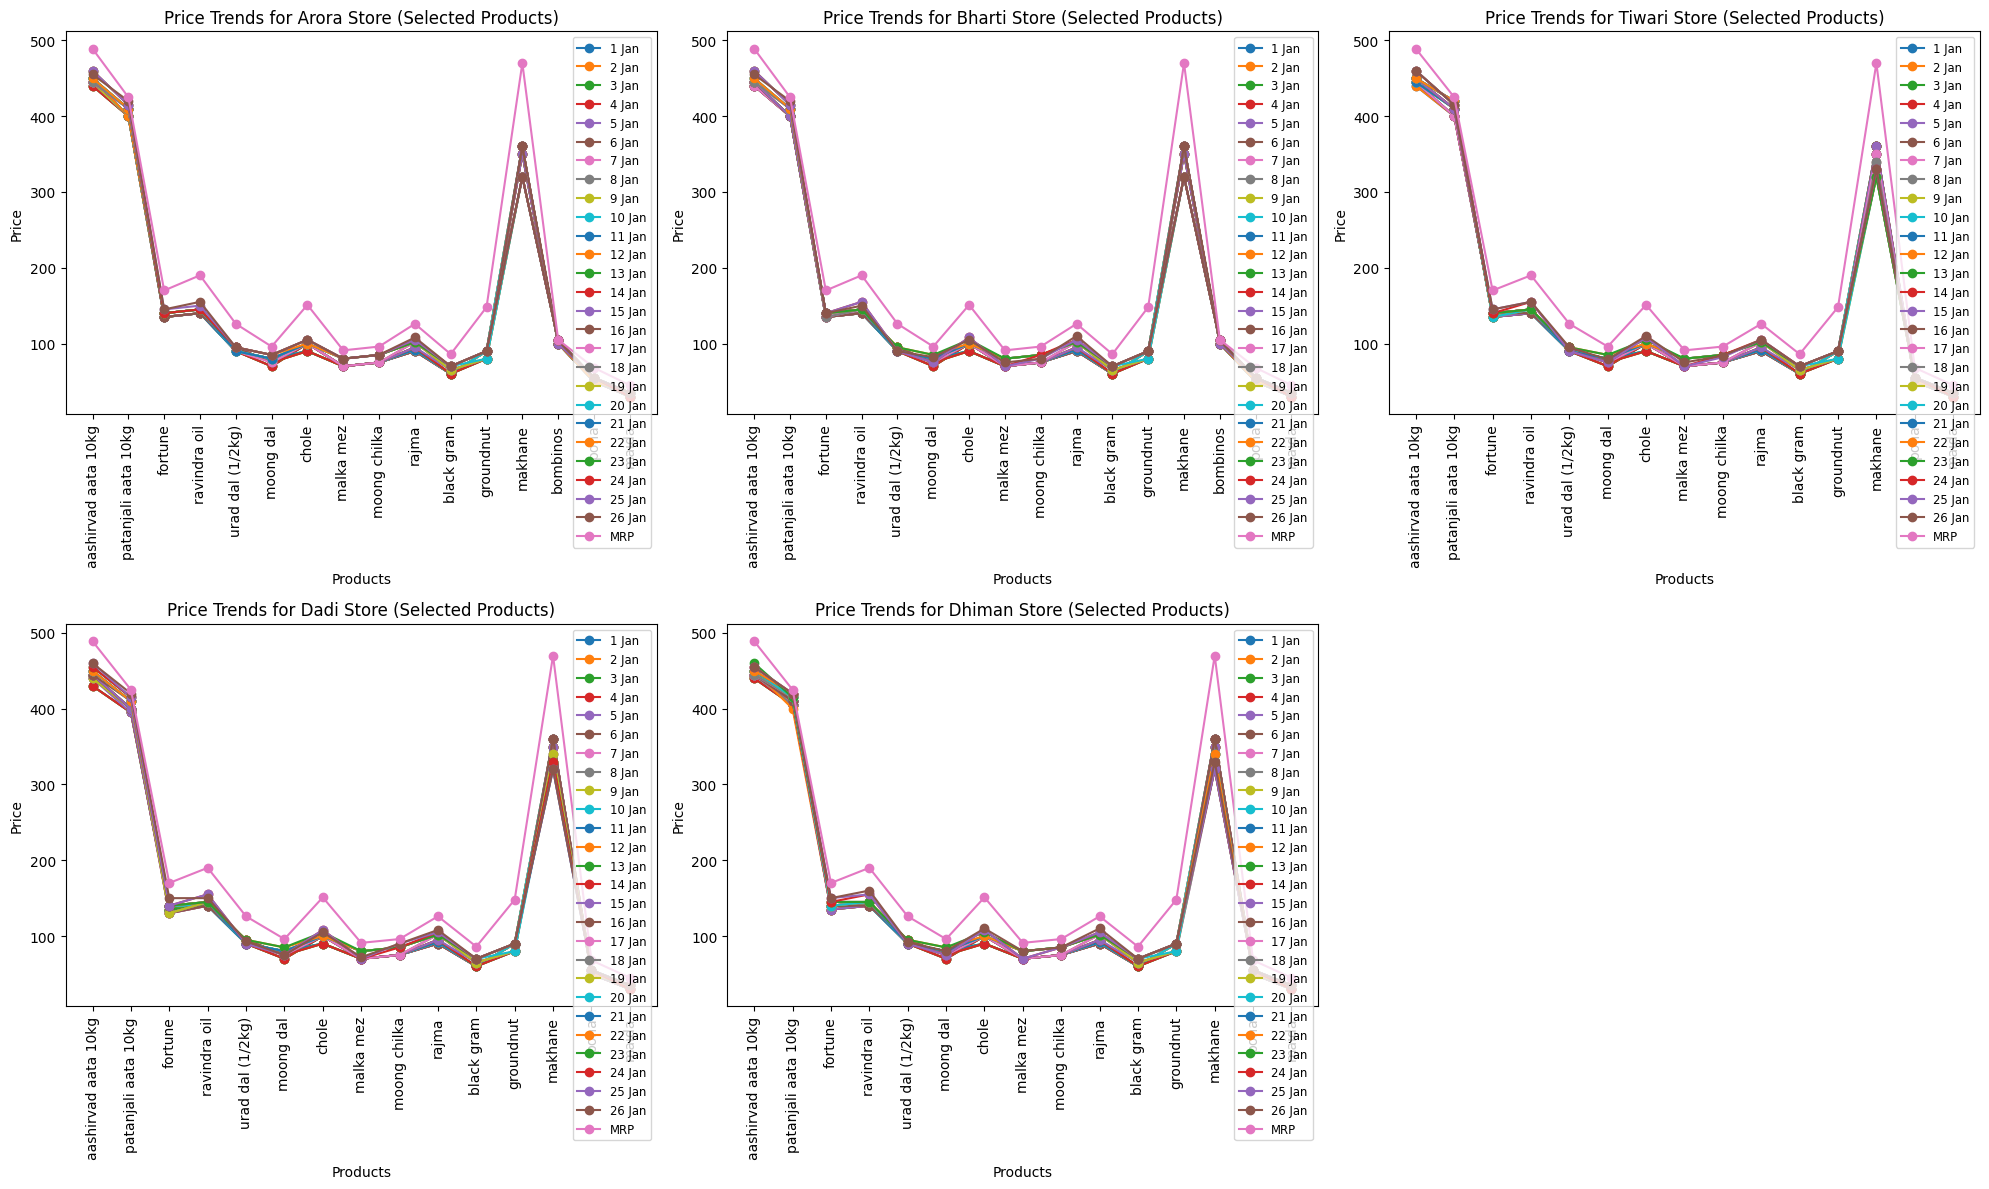

In [ ]:
# --- Visualization 2: Line Chart (Price Trends for Selected Products) ---
plt.figure(figsize=(20, 12))

for i, (store, df) in enumerate(dataset.items()):
    plt.subplot(2, 3, i + 1)  # Arranging subplots dynamically

    df_selected = df[df.iloc[:, 0].isin(selected_products)]  # Filter only selected products
    for date in df_selected.columns[1:]:  # Skip product name column
        plt.plot(df_selected.iloc[:, 0], df_selected[date], marker='o', linestyle='-', label=date)

    plt.xticks(rotation=90)
    plt.xlabel("Products")
    plt.ylabel("Price")
    plt.title(f"Price Trends for {store} (Selected Products)")
    plt.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

In [ ]:
# Save cleaned dataset
combined_df.to_csv("cleaned_budget_basket.csv")

print("\nDataset Analysis, Preprocessing, and Feature Scaling Complete!\nCleaned Data Saved as 'cleaned_budget_basket.csv'")